In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('No_missing_values.csv')
df.sample(4)

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,km,transmission,ownerNo,oem,...,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs
1664,Comprehensive,Petrol,1197 cc,2016.0,Petrol,Hatchback,74777.0,Manual,1,Hyundai,...,Power,tubeless,5.0,295.0,18.60,DOHC,No,5.200000,Chennai,6.31
7633,Comprehensive,Diesel,1493 cc,2021.0,Diesel,SUV,27218.0,Manual,1,Kia,...,Electric,"tubeless,radial",5.0,392.0,18.40,Unknown,Unknown,4.802916,Kolkata,10.35
1100,Third Party insurance,Diesel,1956 cc,2021.0,Diesel,SUV,54568.0,Manual,2,Tata,...,Power,"tubeless,radial",5.0,425.0,16.35,DOHC,Unknown,11.229743,Bangalore,18.85
2233,Third Party insurance,Diesel,1498 cc,2016.0,Diesel,Hatchback,98914.0,Manual,1,Ford,...,EPAS,tubeless,5.0,257.0,25.83,SOHC,No,4.900000,Chennai,3.75


# Outliers

In [5]:
df['km']

0       120000.0
1        32706.0
2        11949.0
3        17794.0
4        60000.0
          ...   
8354     10000.0
8355    120000.0
8356     50000.0
8357     40000.0
8358    120000.0
Name: km, Length: 8359, dtype: float64

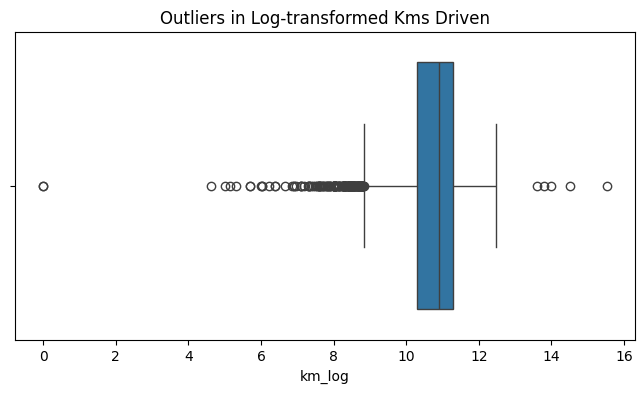

In [11]:
df['km_log'] = np.log1p(df['km'])  # Apply log transformation

plt.figure(figsize=(8,4))
sns.boxplot(x=df['km_log'])
plt.title('Outliers in Log-transformed Kms Driven')
plt.show()


### IQR Method

In [2]:
Q1 = df['km'].quantile(0.20)
Q3 = df['km'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km'] < lower_bound) | (df['km'] > upper_bound)]
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,km,transmission,ownerNo,oem,...,Steering Type,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs
336,Comprehensive,Diesel,2494 cc,2011.0,Diesel,MUV,199000.0,Manual,2,Toyota,...,Power,"tubeless,radial",5.0,478.152259,12.800000,DOHC,No,5.400000,Bangalore,9.50
1234,Comprehensive,Diesel,2982 cc,2011.0,Diesel,SUV,180000.0,Manual,2,Toyota,...,Power,"tubeless,radial",5.0,502.623790,11.500000,DOHC,No,5.900000,Bangalore,11.95
1538,Comprehensive,Diesel,2393 cc,2018.0,Diesel,MUV,800000.0,Manual,1,Toyota,...,Power,"tubeless,radial",5.0,517.805182,13.680000,DOHC,No,5.400000,Chennai,21.50
1539,Comprehensive,Diesel,2143 cc,2018.0,Diesel,Sedan,5500000.0,Automatic,1,Mercedes-Benz,...,Power,"tubeless,radial",4.0,480.000000,19.270000,DOHC,No,5.610000,Chennai,36.00
1946,Comprehensive,Petrol,1497 cc,2014.0,Petrol,Sedan,200300.0,Manual,2,Honda,...,Power,"tubeless,radial",4.0,506.000000,17.000000,SOHC,No,5.300000,Chennai,4.55
1995,Comprehensive,Diesel,2179 cc,2019.0,Diesel,SUV,1200000.0,Manual,1,Mahindra,...,Power,"radial,tubeless",5.0,440.201537,19.256889,DOHC,Unknown,5.400000,Chennai,11.50
2316,Comprehensive,Petrol,1199 cc,2014.0,Petrol,Sedan,222996.0,Manual,1,Honda,...,Electric,"tubeless,radial",4.0,420.000000,18.600000,SOHC,No,4.700000,Chennai,3.00
2347,Comprehensive,Diesel,1248 cc,2009.0,Diesel,Hatchback,176801.0,Manual,1,Maruti,...,Power,tubeless,5.0,268.000000,28.400000,DOHC,No,4.800000,Chennai,2.50
2678,Comprehensive,Diesel,2393 cc,2017.0,Diesel,MUV,2000022.0,Manual,1,Toyota,...,Power,"tubeless,radial",5.0,300.000000,13.680000,DOHC,No,5.400000,Chennai,17.50
3442,Comprehensive,Diesel,2982 cc,2013.0,Diesel,SUV,230000.0,Manual,1,Toyota,...,Power,"tubeless,radial",5.0,296.000000,13.000000,DOHC,No,5.600000,Delhi,9.70


### Z Score Method

In [3]:
from scipy import stats

df['z_score_km'] = np.abs(stats.zscore(df['km']))
outliers = df[df['z_score_km'] > 2]
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,km,transmission,ownerNo,oem,...,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,z_score_km
1538,Comprehensive,Diesel,2393 cc,2018.0,Diesel,MUV,800000.0,Manual,1,Toyota,...,"tubeless,radial",5.0,517.805182,13.680000,DOHC,No,5.400000,Chennai,21.50,10.001353
1539,Comprehensive,Diesel,2143 cc,2018.0,Diesel,Sedan,5500000.0,Automatic,1,Mercedes-Benz,...,"tubeless,radial",4.0,480.000000,19.270000,DOHC,No,5.610000,Chennai,36.00,73.439513
1995,Comprehensive,Diesel,2179 cc,2019.0,Diesel,SUV,1200000.0,Manual,1,Mahindra,...,"radial,tubeless",5.0,440.201537,19.256889,DOHC,Unknown,5.400000,Chennai,11.50,15.400345
2316,Comprehensive,Petrol,1199 cc,2014.0,Petrol,Sedan,222996.0,Manual,1,Honda,...,"tubeless,radial",4.0,420.000000,18.600000,SOHC,No,4.700000,Chennai,3.00,2.213252
2678,Comprehensive,Diesel,2393 cc,2017.0,Diesel,MUV,2000022.0,Manual,1,Toyota,...,"tubeless,radial",5.0,300.000000,13.680000,DOHC,No,5.400000,Chennai,17.50,26.198627
3442,Comprehensive,Diesel,2982 cc,2013.0,Diesel,SUV,230000.0,Manual,1,Toyota,...,"tubeless,radial",5.0,296.000000,13.000000,DOHC,No,5.600000,Delhi,9.70,2.307789
4590,Third Party insurance,Diesel,2446 cc,2003.0,Diesel,SUV,260000.0,Manual,1,Toyota,...,"tubeless,radial",5.0,353.756996,19.256889,SOHC,Unknown,6.212418,Hyderabad,4.35,2.712713
5154,Third Party insurance,Diesel,2494 cc,2008.0,Diesel,MUV,236000.0,Manual,1,Toyota,...,"tubeless,radial",5.0,478.152259,12.800000,DOHC,No,5.400000,Hyderabad,4.99,2.388774
6493,Not Available,Diesel,1248 cc,2013.0,Diesel,MUV,208978.0,Manual,1,Maruti,...,"tubeless,radial",5.0,135.000000,20.770000,DOHC,No,5.200000,Jaipur,4.50,2.024045
6593,Not Available,Diesel,1248 cc,2011.0,Diesel,Sedan,251066.0,Manual,1,Maruti,...,"tubeless,radial",4.0,464.000000,19.300000,DOHC,No,4.700000,Jaipur,1.18,2.592127


In [4]:
from scipy.stats import skew

skewness = skew(df['km'])
skewness

np.float64(50.37814051903379)

##### Since the value is more than 1 the values are highly right skewed

Skewness Value	Interpretation
 > 1	Highly right-skewed (Positive skew)

 0.5 to 1	Moderately right-skewed

 -0.5 to 0.5	Approximately symmetric

 -1 to -0.5	Moderately left-skewed
 
 < -1	Highly left-skewed (Negative skew)

 When to Use Which Method?

 IQR Method → Best for skewed datasets (e.g., car mileage, house prices).

 Z-Score Method → Best for normally distributed data.

Let's try with graphs

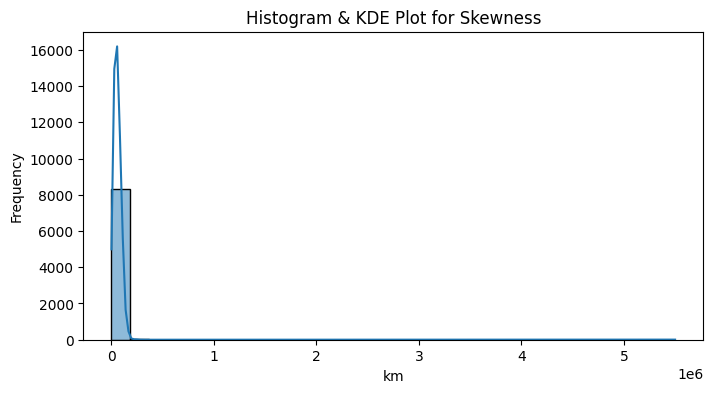

In [19]:
# Histogram with KDE
plt.figure(figsize=(8, 4))
sns.histplot(df["km"], bins=30, kde=True)
plt.title("Histogram & KDE Plot for Skewness")
plt.xlabel("km")
plt.ylabel("Frequency")
plt.show()

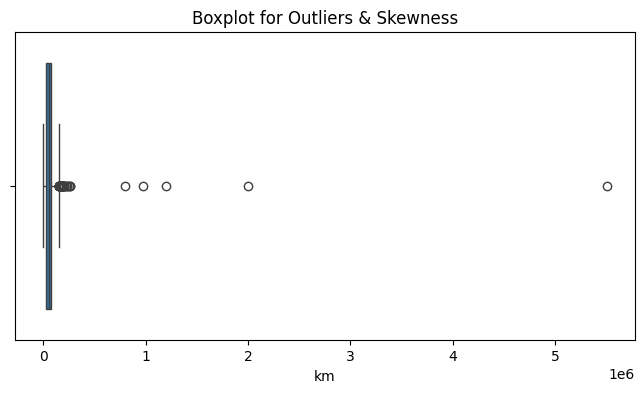

In [20]:
# 🔹 2. Boxplot to Identify Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["km"])
plt.title("Boxplot for Outliers & Skewness")
plt.show()

Let's do logarthmic traformation

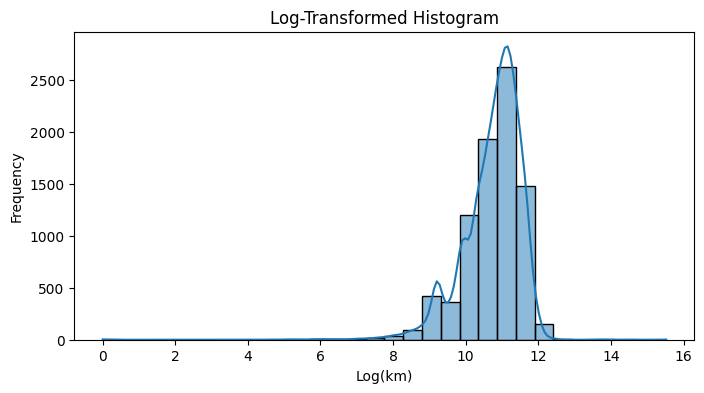

In [5]:
# 🔹 3. Log-Transformed Histogram (For Better Visualization)
df["km_log"] = np.log1p(df["km"])  # Log transform to reduce skewness
plt.figure(figsize=(8, 4))
sns.histplot(df["km_log"], bins=30, kde=True)
plt.title("Log-Transformed Histogram")
plt.xlabel("Log(km)")
plt.ylabel("Frequency")
plt.show()

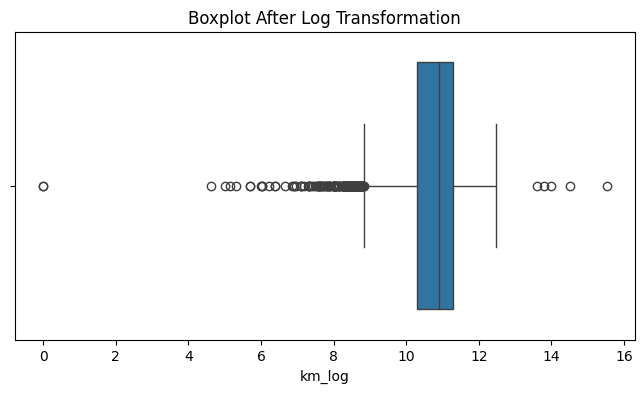

In [6]:
# Boxplot After Transformation
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["km_log"])
plt.title("Boxplot After Log Transformation")
plt.show()

In [23]:
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,km,transmission,ownerNo,oem,...,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_log,z_score_km
1538,Comprehensive,Diesel,2393 cc,2018.0,Diesel,MUV,800000.0,Manual,1,Toyota,...,5.0,517.805182,13.680000,DOHC,No,5.400000,Chennai,21.50,13.592368,10.001353
1539,Comprehensive,Diesel,2143 cc,2018.0,Diesel,Sedan,5500000.0,Automatic,1,Mercedes-Benz,...,4.0,480.000000,19.270000,DOHC,No,5.610000,Chennai,36.00,15.520259,73.439513
1995,Comprehensive,Diesel,2179 cc,2019.0,Diesel,SUV,1200000.0,Manual,1,Mahindra,...,5.0,440.201537,19.256889,DOHC,Unknown,5.400000,Chennai,11.50,13.997833,15.400345
2316,Comprehensive,Petrol,1199 cc,2014.0,Petrol,Sedan,222996.0,Manual,1,Honda,...,4.0,420.000000,18.600000,SOHC,No,4.700000,Chennai,3.00,12.314914,2.213252
2678,Comprehensive,Diesel,2393 cc,2017.0,Diesel,MUV,2000022.0,Manual,1,Toyota,...,5.0,300.000000,13.680000,DOHC,No,5.400000,Chennai,17.50,14.508669,26.198627
3442,Comprehensive,Diesel,2982 cc,2013.0,Diesel,SUV,230000.0,Manual,1,Toyota,...,5.0,296.000000,13.000000,DOHC,No,5.600000,Delhi,9.70,12.345839,2.307789
4590,Third Party insurance,Diesel,2446 cc,2003.0,Diesel,SUV,260000.0,Manual,1,Toyota,...,5.0,353.756996,19.256889,SOHC,Unknown,6.212418,Hyderabad,4.35,12.468441,2.712713
5154,Third Party insurance,Diesel,2494 cc,2008.0,Diesel,MUV,236000.0,Manual,1,Toyota,...,5.0,478.152259,12.800000,DOHC,No,5.400000,Hyderabad,4.99,12.371591,2.388774
6493,Not Available,Diesel,1248 cc,2013.0,Diesel,MUV,208978.0,Manual,1,Maruti,...,5.0,135.000000,20.770000,DOHC,No,5.200000,Jaipur,4.50,12.249989,2.024045
6593,Not Available,Diesel,1248 cc,2011.0,Diesel,Sedan,251066.0,Manual,1,Maruti,...,4.0,464.000000,19.300000,DOHC,No,4.700000,Jaipur,1.18,12.433475,2.592127


## Winsorization: Capping Outliers

Let's clip the data using IQR clipping method

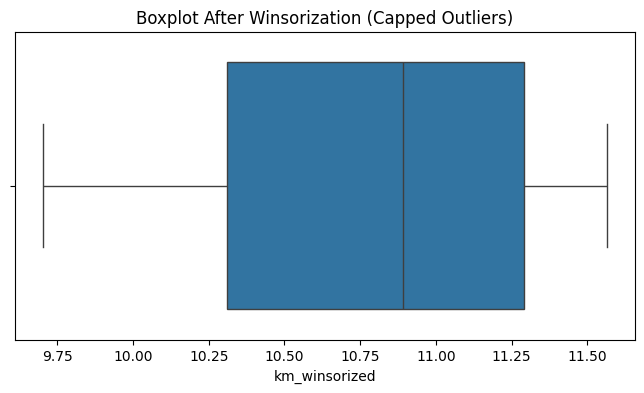

In [7]:
from scipy.stats.mstats import winsorize

# Define Capping Limits (1st and 99th Percentile)
lower_limit = df["km_log"].quantile(0.10)  # 1st percentile
upper_limit = df["km_log"].quantile(0.90)  # 99th percentile

# Apply Winsorization (Capping)
df["km_winsorized"] = np.clip(df["km_log"], lower_limit, upper_limit)

# 📊 Boxplot After Winsorization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["km_winsorized"])
plt.title("Boxplot After Winsorization (Capped Outliers)")
plt.show()


Let's drop other columns and keep only km_winsorized

In [8]:
df.drop(columns=['z_score_km','km','km_log'], inplace=True)

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Year of Manufacture', 'ownerNo', 'Wheel Size', 'No of Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Seating Capacity',
       'No Door Numbers', 'Cargo Volumn', 'Mileage', 'Turning Radius',
       'price_in_lakhs', 'km_winsorized'],
      dtype='object')

## Outliers in price 

In [9]:
Q1 = df['price_in_lakhs'].quantile(0.05)
Q3 = df['price_in_lakhs'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price_in_lakhs'] < lower_bound) | (df['price_in_lakhs'] > upper_bound)]
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,...,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized
584,Third Party insurance,Petrol,796 cc,2018.0,Petrol,Minivans,Manual,5,Maruti,Maruti Omni,...,"tubeless,radial",5.0,173.359618,14.00,SOHC,No,4.100000,Bangalore,580.0,11.289794
595,Third Party insurance,Petrol,1341 cc,2006.0,Petrol,Hatchback,Manual,3,Hyundai,Hyundai Getz,...,"tubeless,radial",5.0,286.338218,15.30,DOHC,No,5.000000,Bangalore,550.0,11.563955
675,Third Party insurance,Diesel,1396 cc,2003.0,Diesel,Hatchback,Manual,1,Tata,Tata Indica V2,...,"tubeless,radial",4.0,217.000000,17.88,SOHC,No,4.900000,Bangalore,700.0,10.819798
690,Third Party insurance,Petrol,970 cc,2018.0,Petrol,Sedan,Manual,3,Maruti,Maruti 1000,...,"tubeless,radial",4.0,353.756996,15.00,undefined,Unknown,6.212418,Bangalore,400.0,10.819798
737,Third Party insurance,Petrol,1389 cc,2004.0,Petrol,Sedan,Manual,1,Opel,OpelCorsa,...,"tubeless,radial",4.0,352.928836,14.20,Unknown,Unknown,4.900000,Bangalore,800.0,11.156265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,Third Party insurance,Petrol,998 cc,2005.0,Petrol,Hatchback,Manual,1,Maruti,Maruti Wagon R,...,"tubeless,radial",4.0,227.250510,18.90,DOHC,No,4.600000,Kolkata,400.0,11.002117
8152,Third Party insurance,Petrol,796 cc,2004.0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto,...,"tubeless,radial",5.0,207.382415,19.70,SOHC,No,4.600000,Kolkata,450.0,10.308986
8300,Third Party insurance,Petrol,1197 cc,2009.0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,...,"tubeless,radial",5.0,232.000000,21.10,DOHC,No,4.700000,Kolkata,750.0,10.819798
8302,Third Party insurance,Petrol,1061 cc,2007.0,Petrol,Hatchback,Manual,1,Maruti,Maruti Wagon R,...,"tubeless,radial",4.0,227.250510,18.90,DOHC,No,4.600000,Kolkata,800.0,9.903538


 Grouping and Replacing Outliers

In [10]:
# Calculate median price for each group
median_price = df.groupby(['oem', 'model'])['price_in_lakhs'].transform('median')

# Replace outlier if it's too high (e.g., >3x median)
df['price_in_lakhs'] = df.apply(lambda row: median_price[row.name] if row['price_in_lakhs'] > 2 * median_price[row.name] else row['price_in_lakhs'], axis=1)


In [36]:
median_price

0        4.430
1        6.770
2        5.115
3        4.370
4        8.500
         ...  
8354     4.430
8355     3.120
8356    26.000
8357     2.870
8358     6.310
Name: price_in_lakhs, Length: 8359, dtype: float64

In [11]:
Q1 = df['price_in_lakhs'].quantile(0.05)
Q3 = df['price_in_lakhs'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price_in_lakhs'] < lower_bound) | (df['price_in_lakhs'] > upper_bound)]
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,...,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized
167,Comprehensive,Petrol,1998 cc,2022.0,Petrol,Sedan,Automatic,1,BMW,BMW 6 Series,...,runflat,4.0,450.000000,13.32,DOHC,No,14.606060,Bangalore,79.00,9.702973
584,Third Party insurance,Petrol,796 cc,2018.0,Petrol,Minivans,Manual,5,Maruti,Maruti Omni,...,"tubeless,radial",5.0,173.359618,14.00,SOHC,No,4.100000,Bangalore,580.00,11.289794
690,Third Party insurance,Petrol,970 cc,2018.0,Petrol,Sedan,Manual,3,Maruti,Maruti 1000,...,"tubeless,radial",4.0,353.756996,15.00,undefined,Unknown,6.212418,Bangalore,400.00,10.819798
737,Third Party insurance,Petrol,1389 cc,2004.0,Petrol,Sedan,Manual,1,Opel,OpelCorsa,...,"tubeless,radial",4.0,352.928836,14.20,Unknown,Unknown,4.900000,Bangalore,800.00,11.156265
758,Third Party insurance,Petrol,1597 cc,2004.0,Petrol,Sedan,Manual,2,Ford,Ford Ikon,...,"tubeless,radial",4.0,400.000000,14.20,SOHC,No,4.900000,Bangalore,550.00,11.289794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114,Comprehensive,Petrol,1997 cc,2020.0,Petrol,SUV,Automatic,2,Land Rover,Land Rover Range Rover Velar,...,"tubeless,radial",4.0,558.000000,15.80,DOHC,No,8.211808,Kolkata,79.00,10.421775
7130,Third Party insurance,Petrol,995 cc,2009.0,Petrol,Hatchback,Manual,3,Chevrolet,Chevrolet Spark,...,"tubeless,radial",5.0,170.000000,18.00,SOHC,No,4.600000,Kolkata,251.05,11.002117
7442,Third Party insurance,Petrol,3982 cc,2016.0,Petrol,Coupe,Automatic,1,Mercedes-Benz,Mercedes-Benz AMG GT,...,tubeless,2.0,285.000000,12.65,DOHC,No,5.750000,Kolkata,210.00,10.308986
7751,Third Party insurance,Petrol,993 cc,2002.0,Petrol,Hatchback,Manual,2,Maruti,Maruti Zen,...,unknown,5.0,217.227500,17.30,SOHC,No,4.900000,Kolkata,480.00,10.819798


In [12]:
df.groupby(['model', 'Year of Manufacture'])['price_in_lakhs'].agg(['sum', 'mean', 'max', 'min'])


sum    mean    max    min
model      Year of Manufacture                              
Ambassador 2013.0                 1.00   1.000   1.00   1.00
           2014.0                 1.20   1.200   1.20   1.20
           2018.0                 1.20   1.200   1.20   1.20
Audi A3    2015.0                41.40  20.700  21.90  19.50
           2016.0                15.00  15.000  15.00  15.00
...                                ...     ...    ...    ...
Volvo XC60 2016.0                16.25  16.250  16.25  16.25
           2018.0                86.00  43.000  48.00  38.00
           2019.0                84.95  42.475  44.95  40.00
           2020.0                99.00  49.500  52.00  47.00
           2021.0               106.50  53.250  61.50  45.00

[1454 rows x 4 columns]

In [13]:
price_dict = df.groupby(['model','Year of Manufacture'])['price_in_lakhs'].mean().to_dict()
price_dict

{('Ambassador', 2013.0): 1.0,
 ('Ambassador', 2014.0): 1.2,
 ('Ambassador', 2018.0): 1.2,
 ('Audi A3', 2015.0): 20.7,
 ('Audi A3', 2016.0): 15.0,
 ('Audi A3', 2018.0): 21.275,
 ('Audi A3', 2019.0): 25.3125,
 ('Audi A3', 2020.0): 24.375,
 ('Audi A3 cabriolet', 2015.0): 34.95,
 ('Audi A4', 2009.0): 10.75,
 ('Audi A4', 2010.0): 7.0,
 ('Audi A4', 2011.0): 9.495000000000001,
 ('Audi A4', 2012.0): 11.916666666666666,
 ('Audi A4', 2013.0): 13.530000000000001,
 ('Audi A4', 2014.0): 12.414285714285715,
 ('Audi A4', 2015.0): 16.745,
 ('Audi A4', 2016.0): 18.113333333333333,
 ('Audi A4', 2017.0): 20.0,
 ('Audi A4', 2018.0): 13.8,
 ('Audi A4', 2021.0): 13.8,
 ('Audi A4', 2022.0): 13.8,
 ('Audi A6', 2012.0): 14.99,
 ('Audi A6', 2013.0): 12.85,
 ('Audi A6', 2014.0): 10.783333333333333,
 ('Audi A6', 2015.0): 19.64454545454545,
 ('Audi A6', 2016.0): 22.47,
 ('Audi A6', 2018.0): 28.5,
 ('Audi A6', 2019.0): 15.0,
 ('Audi A6', 2020.0): 15.0,
 ('Audi A6', 2021.0): 15.0,
 ('Audi A8', 2021.0): 90.0,
 ('Audi

In [14]:
Q1 = df['price_in_lakhs'].quantile(0.15)
Q3 = df['price_in_lakhs'].quantile(0.85)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['is_outlier'] = (df['price_in_lakhs'] < lower_bound) | (df['price_in_lakhs'] > upper_bound)


In [15]:
def replace_outlier(row):
    if row['is_outlier']:  # If the price is an outlier
        key = (row['model'], row['Year of Manufacture'])
        return price_dict.get(key, row['price_in_lakhs'])  # Replace with mean if available
    return row['price_in_lakhs']  # Keep original if not an outlier

df['price_in_lakhs'] = df.apply(replace_outlier, axis=1)
df.drop(columns=['is_outlier'], inplace=True)  # Remove helper column


In [16]:
df[df['model'] == 'Maruti Alto'][['Year of Manufacture', 'price_in_lakhs']]


,Year of Manufacture,price_in_lakhs
53,2008.0,2.500
339,2008.0,2.100
630,2008.0,2.000
661,2006.0,1.650
1143,2009.0,2.100
1846,2012.0,2.350
2059,2007.0,1.650
2333,2009.0,1.800
2392,2007.0,1.650
2756,2010.0,2.100


In [17]:
Q1 = df['price_in_lakhs'].quantile(0.05)
Q3 = df['price_in_lakhs'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price_in_lakhs'] < lower_bound) | (df['price_in_lakhs'] > upper_bound)]
outliers

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,...,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized
167,Comprehensive,Petrol,1998 cc,2022.0,Petrol,Sedan,Automatic,1,BMW,BMW 6 Series,...,runflat,4.0,450.000000,13.32,DOHC,No,14.606060,Bangalore,79.00,9.702973
584,Third Party insurance,Petrol,796 cc,2018.0,Petrol,Minivans,Manual,5,Maruti,Maruti Omni,...,"tubeless,radial",5.0,173.359618,14.00,SOHC,No,4.100000,Bangalore,290.60,11.289794
690,Third Party insurance,Petrol,970 cc,2018.0,Petrol,Sedan,Manual,3,Maruti,Maruti 1000,...,"tubeless,radial",4.0,353.756996,15.00,undefined,Unknown,6.212418,Bangalore,400.00,10.819798
737,Third Party insurance,Petrol,1389 cc,2004.0,Petrol,Sedan,Manual,1,Opel,OpelCorsa,...,"tubeless,radial",4.0,352.928836,14.20,Unknown,Unknown,4.900000,Bangalore,725.00,11.156265
758,Third Party insurance,Petrol,1597 cc,2004.0,Petrol,Sedan,Manual,2,Ford,Ford Ikon,...,"tubeless,radial",4.0,400.000000,14.20,SOHC,No,4.900000,Bangalore,664.00,11.289794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114,Comprehensive,Petrol,1997 cc,2020.0,Petrol,SUV,Automatic,2,Land Rover,Land Rover Range Rover Velar,...,"tubeless,radial",4.0,558.000000,15.80,DOHC,No,8.211808,Kolkata,79.00,10.421775
7130,Third Party insurance,Petrol,995 cc,2009.0,Petrol,Hatchback,Manual,3,Chevrolet,Chevrolet Spark,...,"tubeless,radial",5.0,170.000000,18.00,SOHC,No,4.600000,Kolkata,151.07,11.002117
7442,Third Party insurance,Petrol,3982 cc,2016.0,Petrol,Coupe,Automatic,1,Mercedes-Benz,Mercedes-Benz AMG GT,...,tubeless,2.0,285.000000,12.65,DOHC,No,5.750000,Kolkata,210.00,10.308986
7751,Third Party insurance,Petrol,993 cc,2002.0,Petrol,Hatchback,Manual,2,Maruti,Maruti Zen,...,unknown,5.0,217.227500,17.30,SOHC,No,4.900000,Kolkata,240.60,10.819798


In [18]:
df[df['price_in_lakhs'] > 100]  # Adjust threshold based on reasonable price limits


,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,...,Tyre Type,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized
584,Third Party insurance,Petrol,796 cc,2018.0,Petrol,Minivans,Manual,5,Maruti,Maruti Omni,...,"tubeless,radial",5.0,173.359618,14.000000,SOHC,No,4.100000,Bangalore,290.600,11.289794
690,Third Party insurance,Petrol,970 cc,2018.0,Petrol,Sedan,Manual,3,Maruti,Maruti 1000,...,"tubeless,radial",4.0,353.756996,15.000000,undefined,Unknown,6.212418,Bangalore,400.000,10.819798
737,Third Party insurance,Petrol,1389 cc,2004.0,Petrol,Sedan,Manual,1,Opel,OpelCorsa,...,"tubeless,radial",4.0,352.928836,14.200000,Unknown,Unknown,4.900000,Bangalore,725.000,11.156265
758,Third Party insurance,Petrol,1597 cc,2004.0,Petrol,Sedan,Manual,2,Ford,Ford Ikon,...,"tubeless,radial",4.0,400.000000,14.200000,SOHC,No,4.900000,Bangalore,664.000,11.289794
823,Third Party insurance,Petrol,2998 cc,2022.0,Petrol,SUV,Automatic,1,BMW,BMW X7,...,tubeless. runflat,5.0,573.214893,10.540000,DOHC,No,13.306949,Bangalore,130.000,9.702973
840,Third Party insurance,Petrol,1589 cc,2003.0,Petrol,Sedan,Manual,2,Opel,OpelCorsa,...,"tubeless,radial",4.0,351.542352,13.800000,Unknown,Unknown,5.100000,Bangalore,750.000,11.563955
855,Third Party insurance,Petrol,624 cc,2011.0,Petrol,Hatchback,Manual,2,Tata,Tata Nano,...,"tubeless,radial",4.0,104.781992,26.000000,SOHC,No,4.000000,Bangalore,610.000,11.289794
863,Third Party insurance,Petrol,1389 cc,2004.0,Petrol,Sedan,Manual,4,Opel,OpelCorsa,...,"tubeless,radial",4.0,352.928836,14.200000,Unknown,Unknown,4.900000,Bangalore,725.000,11.563955
887,Third Party insurance,Petrol,1597 cc,2004.0,Petrol,Sedan,Manual,2,Ford,Ford Ikon,...,"tubeless,radial",4.0,400.000000,14.200000,SOHC,No,4.900000,Bangalore,664.000,11.289794
890,Third Party insurance,Petrol,1597 cc,2004.0,Petrol,Sedan,Manual,2,Ford,Ford Ikon,...,"tubeless,radial",4.0,400.000000,14.200000,SOHC,No,4.900000,Bangalore,664.000,11.289794


In [19]:
from scipy.stats.mstats import winsorize

# Define Capping Limits (1st and 99th Percentile)
lower_limit = df["price_in_lakhs"].quantile(0.10)  # 1st percentile
upper_limit = df["price_in_lakhs"].quantile(0.90)  # 99th percentile

# Apply Winsorization (Capping)
df["price_in_lakhs_winzorized"] = np.clip(df["price_in_lakhs"], lower_limit, upper_limit)

In [ ]:
df['original_price'] = df['price_in_lakhs']  
df[df['original_price'] != df['price_in_lakhs']][['model', 'Year of Manufacture', 'original_price', 'price_in_lakhs']]


,model,Year of Manufacture,original_price,price_in_lakhs


In [ ]:
from scipy.stats import skew

skewness = skew(df['km'])
skewness

np.float64(50.37814051903379)

In [20]:
df.head()

,Insurance Validity,Fuel Type,Engine Displacement,Year of Manufacture,ft,bt,transmission,ownerNo,oem,model,...,No Door Numbers,Cargo Volumn,Mileage,Value Configuration,Super Charger,Turning Radius,City,price_in_lakhs,km_winsorized,price_in_lakhs_winzorized
0,Third Party insurance,Petrol,998 cc,2015.0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,...,5.0,235.0,23.10,DOHC,No,4.7,Bangalore,4.00,11.563955,4.00
1,Comprehensive,Petrol,1497 cc,2018.0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,...,4.0,352.0,17.00,DOHC,No,5.3,Bangalore,8.11,10.395344,8.11
2,Comprehensive,Petrol,1199 cc,2018.0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,...,5.0,242.0,23.84,DOHC,No,4.9,Bangalore,5.85,9.702973,5.85
3,Comprehensive,Petrol,1197 cc,2014.0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,...,4.0,407.0,19.10,DOHC,No,4.7,Bangalore,4.62,9.786673,4.62
4,Third Party insurance,Diesel,1248 cc,2015.0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,...,5.0,353.0,23.65,DOHC,No,5.2,Bangalore,7.90,11.002117,7.90


In [21]:
df.to_csv('cleaned_data.csv', index=False)